In [1]:
from typing import List, Tuple


def get_overlapping_compounds(compounds_list_1: List[dict],
                              compounds_list_2: List[dict]) -> Tuple[List[dict]]:
    data_1, data_2 = [], []
    for c1 in compounds_list_1:
        for c2 in compounds_list_2:
            if c1["canonical_smiles"] == c2["canonical_smiles"]:
                data_1.append(c1)
                data_2.append(c2)
    return (data_1, data_2)

In [2]:
from csv import DictReader


with open("data/combustdb_master.csv", "r") as csv_file:
    reader = DictReader(csv_file)
    rows = [r for r in reader]
csv_file.close()

Hoeffding coefficient: 0.42544345863131755
Pearson coefficient, p-value: PearsonRResult(statistic=0.9193121734833534, pvalue=4.234966498764225e-121)
Spearman coefficient, p-value: SignificanceResult(statistic=0.8862503183245312, pvalue=2.865627033888043e-100)


<Figure size 640x480 with 0 Axes>

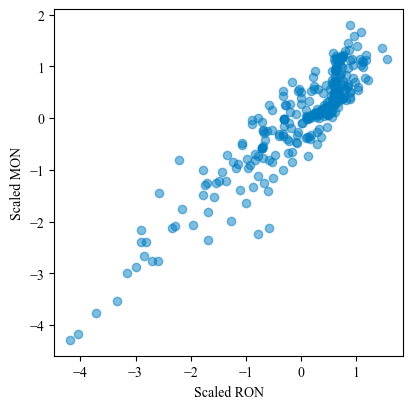

In [3]:
###############
### RON/MON ###
###############

from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

from scipy.stats import pearsonr, spearmanr
from hoeffdingd import hoeffdingd


PROPERTY_1 = "properties.research_octane_number.value"
PROPERTY_2 = "properties.motor_octane_number.value"
PROP_SHORTHAND_1 = "ron"
PROP_SHORTHAND_2 = "mon"

compounds_1 = [r for r in rows if r[PROPERTY_1] != "-"]
compounds_2 = [r for r in rows if r[PROPERTY_2] != "-"]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.054978524376155136
Pearson coefficient, p-value: PearsonRResult(statistic=-0.16924290153302957, pvalue=0.06576356198182619)
Spearman coefficient, p-value: SignificanceResult(statistic=-0.3348467610874218, pvalue=0.00019746517730700685)


<Figure size 640x480 with 0 Axes>

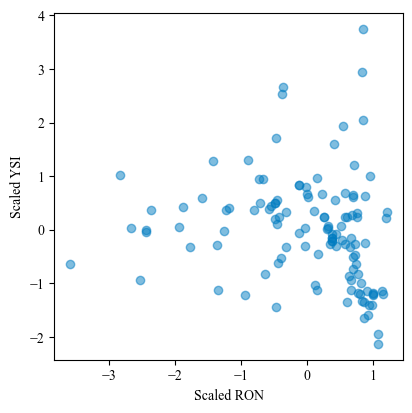

In [4]:
###############
### RON/YSI ###
###############


PROPERTY_1 = "properties.research_octane_number.value"
PROPERTY_2 = "properties.ysi_unified.value"
PROP_SHORTHAND_1 = "ron"
PROP_SHORTHAND_2 = "ysi"

compounds_1 = [r for r in rows if r[PROPERTY_1] != "-"]
compounds_2 = [r for r in rows if r[PROPERTY_2] != "-"]

# remove YSI > 150 for analysis
compounds_2 = [c for c in compounds_2 if float(c[PROPERTY_2]) < 150]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.010355899594350515
Pearson coefficient, p-value: PearsonRResult(statistic=0.018770027876559982, pvalue=0.8435716330259375)
Spearman coefficient, p-value: SignificanceResult(statistic=0.08080236753159961, pvalue=0.3948899107350198)


<Figure size 640x480 with 0 Axes>

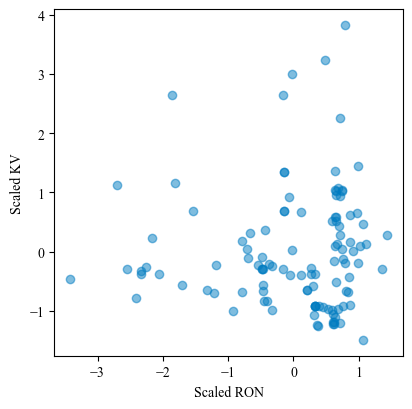

In [5]:
##############
### RON/KV ###
##############


PROPERTY_1 = "properties.research_octane_number.value"
PROPERTY_2 = "properties.kinematic_viscosity.value"
PROP_SHORTHAND_1 = "ron"
PROP_SHORTHAND_2 = "kv"

compounds_1 = [r for r in rows if r[PROPERTY_1] != "-"]
compounds_2 = [r for r in rows if r[PROPERTY_2] != "-"]

# remove KV > 2.0 for analysis
compounds_2 = [c for c in compounds_2 if float(c[PROPERTY_2]) < 2.0]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: -0.0026728524261419
Pearson coefficient, p-value: PearsonRResult(statistic=0.04771039905646163, pvalue=0.6782881864203903)
Spearman coefficient, p-value: SignificanceResult(statistic=0.12105899178368724, pvalue=0.29106361918182594)


<Figure size 640x480 with 0 Axes>

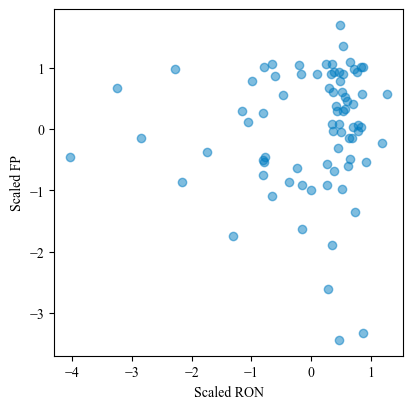

In [6]:
##############
### RON/FP ###
##############


PROPERTY_1 = "properties.research_octane_number.value"
PROPERTY_2 = "properties.flash_point.value"
PROP_SHORTHAND_1 = "ron"
PROP_SHORTHAND_2 = "fp"

compounds_1 = [r for r in rows if r[PROPERTY_1] != "-"]
compounds_2 = [r for r in rows if r[PROPERTY_2] != "-"]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.07347975186195252
Pearson coefficient, p-value: PearsonRResult(statistic=-0.3574798112341182, pvalue=0.0009769225545929825)
Spearman coefficient, p-value: SignificanceResult(statistic=-0.4616291604804909, pvalue=1.2697668284274392e-05)


<Figure size 640x480 with 0 Axes>

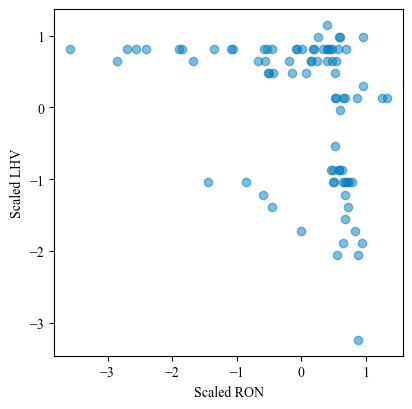

In [7]:
###############
### RON/LHV ###
###############

from ecnet.datasets import load_lhv


PROPERTY_1 = "properties.research_octane_number.value"
PROPERTY_2 = "properties.lhv.value"
PROP_SHORTHAND_1 = "ron"
PROP_SHORTHAND_2 = "lhv"

compounds_1 = [r for r in rows if r[PROPERTY_1] != "-"]
_smiles_lhv, _lhv = load_lhv()
compounds_2 = [
    {
        "canonical_smiles": _smiles_lhv[i],
        "properties.lhv.value": _lhv[i][0]
    } for i in range(len(_smiles_lhv))
]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.06330991613907858
Pearson coefficient, p-value: PearsonRResult(statistic=-0.2524400182834294, pvalue=0.005610182229288818)
Spearman coefficient, p-value: SignificanceResult(statistic=-0.3958023232199597, pvalue=8.371095795091476e-06)


<Figure size 640x480 with 0 Axes>

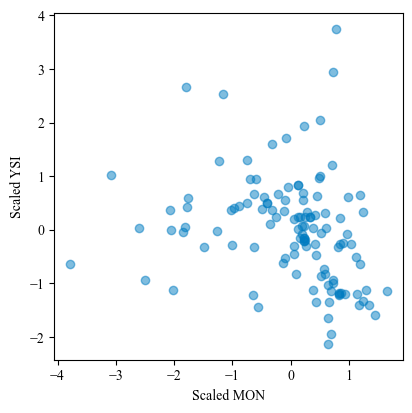

In [8]:
###############
### MON/YSI ###
###############


PROPERTY_1 = "properties.motor_octane_number.value"
PROPERTY_2 = "properties.ysi_unified.value"
PROP_SHORTHAND_1 = "mon"
PROP_SHORTHAND_2 = "ysi"

compounds_1 = [r for r in rows if r[PROPERTY_1] != "-"]
compounds_2 = [r for r in rows if r[PROPERTY_2] != "-"]

# remove YSI > 150 for analysis
compounds_2 = [c for c in compounds_2 if float(c[PROPERTY_2]) < 150]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.015626305640551702
Pearson coefficient, p-value: PearsonRResult(statistic=0.05874447305879846, pvalue=0.5365402555380181)
Spearman coefficient, p-value: SignificanceResult(statistic=0.1646540915535799, pvalue=0.08137702271109756)


<Figure size 640x480 with 0 Axes>

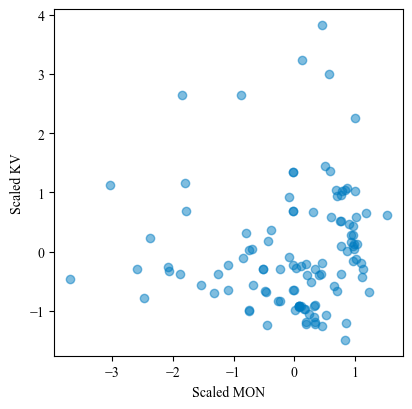

In [9]:
##############
### MON/KV ###
##############


PROPERTY_1 = "properties.motor_octane_number.value"
PROPERTY_2 = "properties.kinematic_viscosity.value"
PROP_SHORTHAND_1 = "mon"
PROP_SHORTHAND_2 = "kv"

compounds_1 = [r for r in rows if r[PROPERTY_1] != "-"]
compounds_2 = [r for r in rows if r[PROPERTY_2] != "-"]

# remove KV > 2.0 for analysis
compounds_2 = [c for c in compounds_2 if float(c[PROPERTY_2]) < 2.0]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.011171252289673342
Pearson coefficient, p-value: PearsonRResult(statistic=0.11599028630131605, pvalue=0.31188350600511694)
Spearman coefficient, p-value: SignificanceResult(statistic=0.21995939931432543, pvalue=0.05298601081869347)


<Figure size 640x480 with 0 Axes>

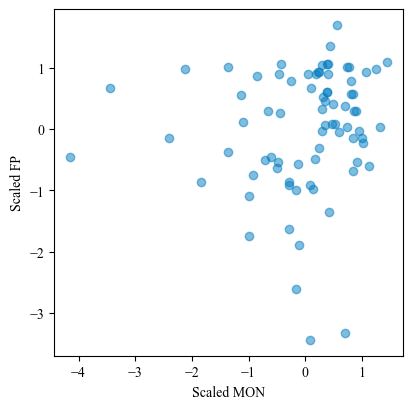

In [10]:
##############
### MON/FP ###
##############


PROPERTY_1 = "properties.motor_octane_number.value"
PROPERTY_2 = "properties.flash_point.value"
PROP_SHORTHAND_1 = "mon"
PROP_SHORTHAND_2 = "fp"

compounds_1 = [r for r in rows if r[PROPERTY_1] != "-"]
compounds_2 = [r for r in rows if r[PROPERTY_2] != "-"]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.05195607175224084
Pearson coefficient, p-value: PearsonRResult(statistic=-0.36926806013202024, pvalue=0.000640072905754246)
Spearman coefficient, p-value: SignificanceResult(statistic=-0.43741918395449103, pvalue=3.9699059141357495e-05)


<Figure size 640x480 with 0 Axes>

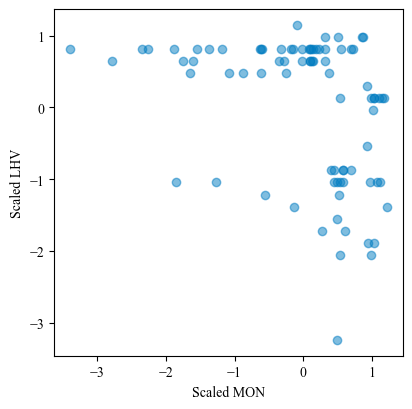

In [11]:
###############
### MON/LHV ###
###############

from ecnet.datasets import load_lhv


PROPERTY_1 = "properties.motor_octane_number.value"
PROPERTY_2 = "properties.lhv.value"
PROP_SHORTHAND_1 = "mon"
PROP_SHORTHAND_2 = "lhv"

compounds_1 = [r for r in rows if r[PROPERTY_1] != "-"]
_smiles_lhv, _lhv = load_lhv()
compounds_2 = [
    {
        "canonical_smiles": _smiles_lhv[i],
        "properties.lhv.value": _lhv[i][0]
    } for i in range(len(_smiles_lhv))
]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.07538362778119129
Pearson coefficient, p-value: PearsonRResult(statistic=0.21942368186047617, pvalue=0.03559308037649419)
Spearman coefficient, p-value: SignificanceResult(statistic=0.33825524060461015, pvalue=0.0009742846357273493)


<Figure size 640x480 with 0 Axes>

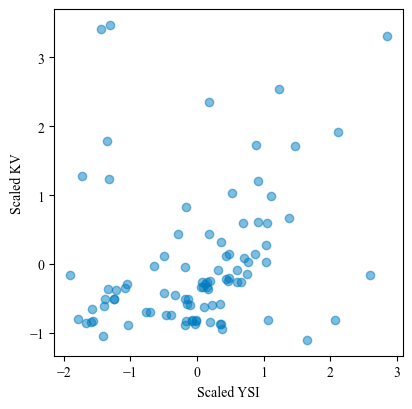

In [12]:
##############
### YSI/KV ###
##############


PROPERTY_1 = "properties.ysi_unified.value"
PROPERTY_2 = "properties.kinematic_viscosity.value"
PROP_SHORTHAND_1 = "ysi"
PROP_SHORTHAND_2 = "kv"

compounds_1 = [r for r in rows if r[PROPERTY_1] != "-"]
compounds_2 = [r for r in rows if r[PROPERTY_2] != "-"]

# remove YSI > 150 for analysis
compounds_1 = [c for c in compounds_1 if float(c[PROPERTY_1]) < 150]

# remove KV > 2.0 for analysis
compounds_2 = [c for c in compounds_2 if float(c[PROPERTY_2]) < 2.0]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.024159562428995335
Pearson coefficient, p-value: PearsonRResult(statistic=0.2744205612914013, pvalue=0.00275215574050404)
Spearman coefficient, p-value: SignificanceResult(statistic=0.21707638481285196, pvalue=0.01872625050429956)


<Figure size 640x480 with 0 Axes>

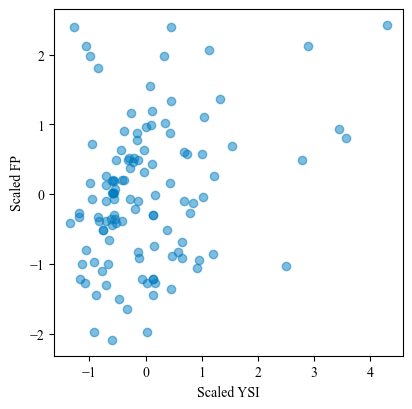

In [13]:
##############
### YSI/FP ###
##############


PROPERTY_1 = "properties.ysi_unified.value"
PROPERTY_2 = "properties.flash_point.value"
PROP_SHORTHAND_1 = "ysi"
PROP_SHORTHAND_2 = "fp"

compounds_1 = [r for r in rows if r[PROPERTY_1] != "-"]
compounds_2 = [r for r in rows if r[PROPERTY_2] != "-"]

# remove YSI > 150 for analysis
compounds_1 = [c for c in compounds_1 if float(c[PROPERTY_1]) < 150]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.2799433054479181
Pearson coefficient, p-value: PearsonRResult(statistic=0.5185273442403028, pvalue=4.992337320139589e-10)
Spearman coefficient, p-value: SignificanceResult(statistic=0.7637996881228177, pvalue=2.4671140362690706e-25)


<Figure size 640x480 with 0 Axes>

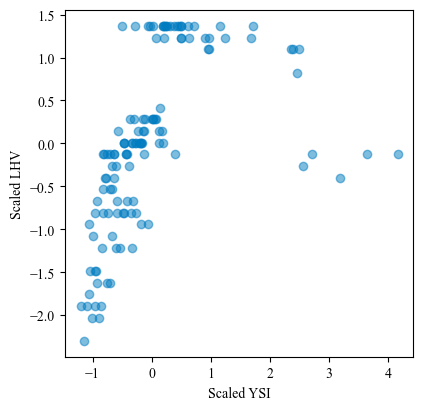

In [14]:
###############
### YSI/LHV ###
###############


PROPERTY_1 = "properties.ysi_unified.value"
PROPERTY_2 = "properties.lhv.value"
PROP_SHORTHAND_1 = "ysi"
PROP_SHORTHAND_2 = "lhv"

compounds_1 = [r for r in rows if r[PROPERTY_1] != "-"]
_smiles_lhv, _lhv = load_lhv()
compounds_2 = [
    {
        "canonical_smiles": _smiles_lhv[i],
        "properties.lhv.value": _lhv[i][0]
    } for i in range(len(_smiles_lhv))
]

# remove YSI > 150 for analysis
compounds_1 = [c for c in compounds_1 if float(c[PROPERTY_1]) < 150]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.33344400818311887
Pearson coefficient, p-value: PearsonRResult(statistic=0.7130452613977829, pvalue=3.389402100373894e-10)
Spearman coefficient, p-value: SignificanceResult(statistic=0.8026643831188369, pvalue=3.5375249677625756e-14)


<Figure size 640x480 with 0 Axes>

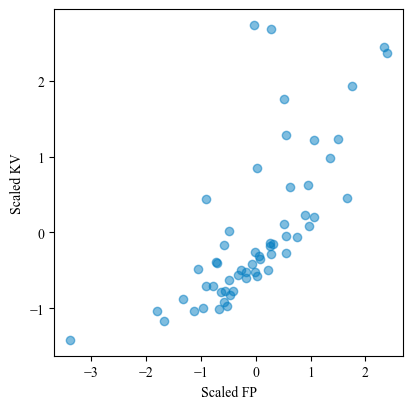

In [15]:
#############
### FP/KV ###
#############


PROPERTY_1 = "properties.flash_point.value"
PROPERTY_2 = "properties.kinematic_viscosity.value"
PROP_SHORTHAND_1 = "fp"
PROP_SHORTHAND_2 = "kv"

compounds_1 = [r for r in rows if r[PROPERTY_1] != "-"]
compounds_2 = [r for r in rows if r[PROPERTY_2] != "-"]

# remove KV > 2.0 for analysis
compounds_2 = [c for c in compounds_2 if float(c[PROPERTY_2]) < 2.0]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.035468221098092875
Pearson coefficient, p-value: PearsonRResult(statistic=-0.4844466554073476, pvalue=4.959581185066552e-07)
Spearman coefficient, p-value: SignificanceResult(statistic=-0.39251838222607466, pvalue=6.991759794425183e-05)


<Figure size 640x480 with 0 Axes>

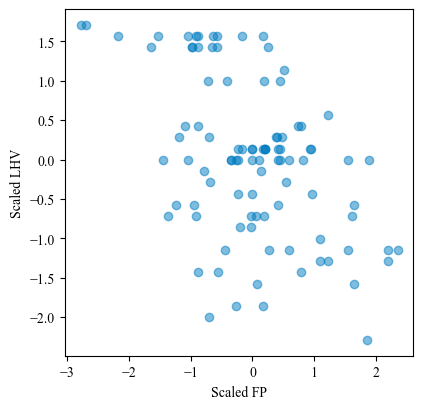

In [16]:
##############
### FP/LHV ###
##############


PROPERTY_1 = "properties.flash_point.value"
PROPERTY_2 = "properties.lhv.value"
PROP_SHORTHAND_1 = "fp"
PROP_SHORTHAND_2 = "lhv"

compounds_1 = [r for r in rows if r[PROPERTY_1] != "-"]
_smiles_lhv, _lhv = load_lhv()
compounds_2 = [
    {
        "canonical_smiles": _smiles_lhv[i],
        "properties.lhv.value": _lhv[i][0]
    } for i in range(len(_smiles_lhv))
]

# remove YSI > 150 for analysis
compounds_1 = [c for c in compounds_1 if float(c[PROPERTY_1]) < 150]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.07992733631252016
Pearson coefficient, p-value: PearsonRResult(statistic=-0.3268157057082832, pvalue=0.003958262479342318)
Spearman coefficient, p-value: SignificanceResult(statistic=-0.4924108595627086, pvalue=6.237495272750431e-06)


<Figure size 640x480 with 0 Axes>

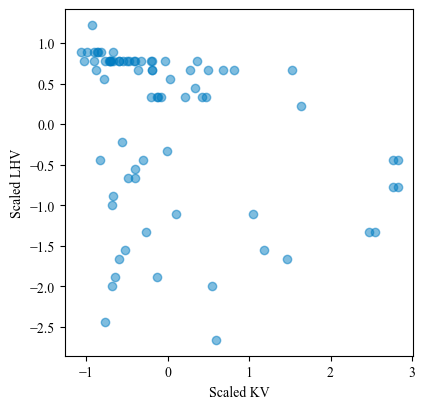

In [17]:
##############
### KV/LHV ###
##############


PROPERTY_1 = "properties.kinematic_viscosity.value"
PROPERTY_2 = "properties.lhv.value"
PROP_SHORTHAND_1 = "kv"
PROP_SHORTHAND_2 = "lhv"

compounds_1 = [r for r in rows if r[PROPERTY_1] != "-"]
_smiles_lhv, _lhv = load_lhv()
compounds_2 = [
    {
        "canonical_smiles": _smiles_lhv[i],
        "properties.lhv.value": _lhv[i][0]
    } for i in range(len(_smiles_lhv))
]

# remove KV > 2.0 for analysis
compounds_1 = [c for c in compounds_1 if float(c[PROPERTY_1]) < 2.0]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: -0.004140768140073481
Pearson coefficient, p-value: PearsonRResult(statistic=-0.030397226382472935, pvalue=0.7863175955938838)
Spearman coefficient, p-value: SignificanceResult(statistic=-0.056573547350298875, pvalue=0.613674617065103)


<Figure size 640x480 with 0 Axes>

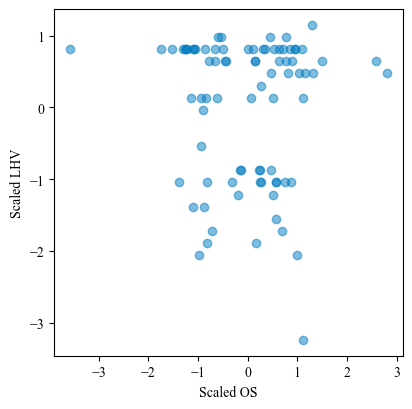

In [18]:
##############
### OS/LHV ###
##############


PROPERTY_1_1 = "properties.research_octane_number.value"
PROPERTY_1_2 = "properties.motor_octane_number.value"
PROPERTY_1 = "properties.os.value"
PROPERTY_2 = "properties.lhv.value"
PROP_SHORTHAND_1 = "os"
PROP_SHORTHAND_2 = "lhv"

compounds_1 = [r for r in rows if r[PROPERTY_1_1] != "-"]
for c in compounds_1:
    c["properties.os.value"] = float(c[PROPERTY_1_1]) - float(c[PROPERTY_1_2])
_smiles_lhv, _lhv = load_lhv()
compounds_2 = [
    {
        "canonical_smiles": _smiles_lhv[i],
        "properties.lhv.value": _lhv[i][0]
    } for i in range(len(_smiles_lhv))
]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.03177212653603262
Pearson coefficient, p-value: PearsonRResult(statistic=-0.09923944116375479, pvalue=0.2956605621448687)
Spearman coefficient, p-value: SignificanceResult(statistic=-0.18651652707239064, pvalue=0.04792340483601942)


<Figure size 640x480 with 0 Axes>

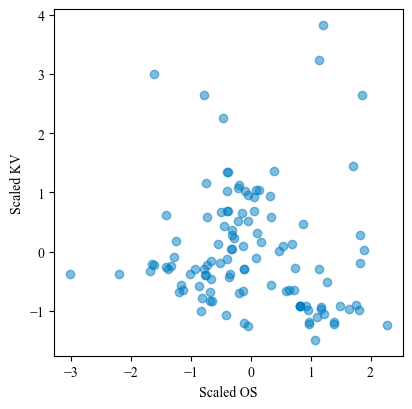

In [19]:
#############
### OS/KV ###
#############


PROPERTY_1_1 = "properties.research_octane_number.value"
PROPERTY_1_2 = "properties.motor_octane_number.value"
PROPERTY_1 = "properties.os.value"
PROPERTY_2 = "properties.kinematic_viscosity.value"
PROP_SHORTHAND_1 = "os"
PROP_SHORTHAND_2 = "kv"

compounds_1 = [r for r in rows if r[PROPERTY_1_1] != "-"]
for c in compounds_1:
    c["properties.os.value"] = float(c[PROPERTY_1_1]) - float(c[PROPERTY_1_2])
compounds_2 = [r for r in rows if r[PROPERTY_2] != "-"]

# remove KV > 2.0 for analysis
compounds_2 = [c for c in compounds_2 if float(c[PROPERTY_2]) < 2.0]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.0006146769304664041
Pearson coefficient, p-value: PearsonRResult(statistic=-0.16617404153623963, pvalue=0.14593370276105697)
Spearman coefficient, p-value: SignificanceResult(statistic=-0.11820734881873622, pvalue=0.3026613429637362)


<Figure size 640x480 with 0 Axes>

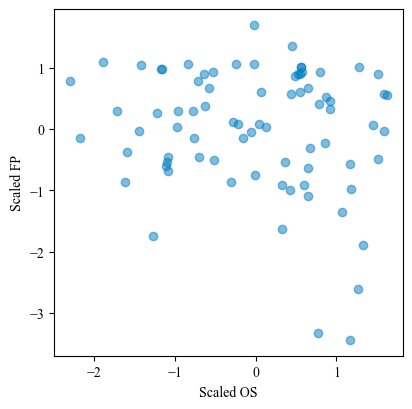

In [20]:
#############
### OS/FP ###
#############


PROPERTY_1_1 = "properties.research_octane_number.value"
PROPERTY_1_2 = "properties.motor_octane_number.value"
PROPERTY_1 = "properties.os.value"
PROPERTY_2 = "properties.flash_point.value"
PROP_SHORTHAND_1 = "os"
PROP_SHORTHAND_2 = "fp"

compounds_1 = [r for r in rows if r[PROPERTY_1_1] != "-"]
for c in compounds_1:
    c["properties.os.value"] = float(c[PROPERTY_1_1]) - float(c[PROPERTY_1_2])
compounds_2 = [r for r in rows if r[PROPERTY_2] != "-"]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.0013056007737284017
Pearson coefficient, p-value: PearsonRResult(statistic=-0.055756888071907595, pvalue=0.5038512607341581)
Spearman coefficient, p-value: SignificanceResult(statistic=-0.016041254736514386, pvalue=0.8476062815104968)


<Figure size 640x480 with 0 Axes>

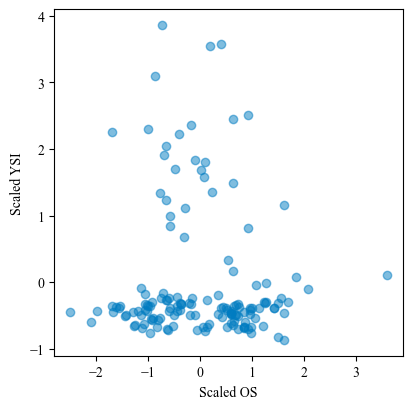

In [21]:
##############
### OS/YSI ###
##############


PROPERTY_1_1 = "properties.research_octane_number.value"
PROPERTY_1_2 = "properties.motor_octane_number.value"
PROPERTY_1 = "properties.os.value"
PROPERTY_2 = "properties.ysi_unified.value"
PROP_SHORTHAND_1 = "os"
PROP_SHORTHAND_2 = "ysi"

compounds_1 = [r for r in rows if r[PROPERTY_1_1] != "-"]
for c in compounds_1:
    c["properties.os.value"] = float(c[PROPERTY_1_1]) - float(c[PROPERTY_1_2])
compounds_2 = [r for r in rows if r[PROPERTY_2] != "-"]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.05547377268188026
Pearson coefficient, p-value: PearsonRResult(statistic=0.47985881427533456, pvalue=1.8780787646307817e-18)
Spearman coefficient, p-value: SignificanceResult(statistic=0.3724527358679745, pvalue=3.579250808585006e-11)


<Figure size 640x480 with 0 Axes>

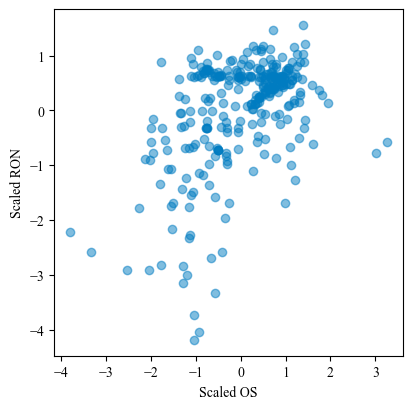

In [22]:
##############
### OS/RON ###
##############


PROPERTY_1_1 = "properties.research_octane_number.value"
PROPERTY_1_2 = "properties.motor_octane_number.value"
PROPERTY_1 = "properties.os.value"
PROPERTY_2 = "properties.research_octane_number.value"
PROP_SHORTHAND_1 = "os"
PROP_SHORTHAND_2 = "ron"

compounds_1 = [r for r in rows if r[PROPERTY_1_1] != "-"]
for c in compounds_1:
    c["properties.os.value"] = float(c[PROPERTY_1_1]) - float(c[PROPERTY_1_2])
compounds_2 = [r for r in rows if r[PROPERTY_2] != "-"]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()

Hoeffding coefficient: 0.025366717576268627
Pearson coefficient, p-value: PearsonRResult(statistic=0.09730035352771808, pvalue=0.0947409726431194)
Spearman coefficient, p-value: SignificanceResult(statistic=-0.0099454487992317, pvalue=0.8647048571901136)


<Figure size 640x480 with 0 Axes>

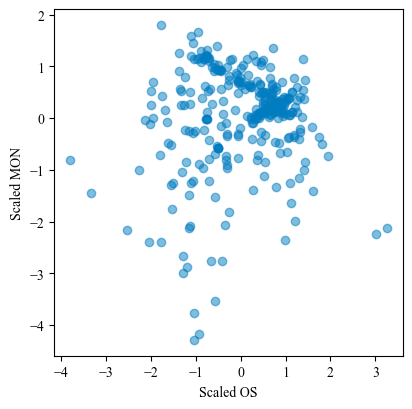

In [23]:
##############
### OS/MON ###
##############


PROPERTY_1_1 = "properties.research_octane_number.value"
PROPERTY_1_2 = "properties.motor_octane_number.value"
PROPERTY_1 = "properties.os.value"
PROPERTY_2 = "properties.motor_octane_number.value"
PROP_SHORTHAND_1 = "os"
PROP_SHORTHAND_2 = "mon"

compounds_1 = [r for r in rows if r[PROPERTY_1_1] != "-"]
for c in compounds_1:
    c["properties.os.value"] = float(c[PROPERTY_1_1]) - float(c[PROPERTY_1_2])
compounds_2 = [r for r in rows if r[PROPERTY_2] != "-"]

_d1, _d2 = get_overlapping_compounds(compounds_1, compounds_2)
data_1 = [[float(r[PROPERTY_1])] for r in _d1]
data_2 = [[float(r[PROPERTY_2])] for r in _d2]

scalar_1 = StandardScaler()
scalar_1.fit(data_1)
scalar_2 = StandardScaler()
scalar_2.fit(data_2)

data_1_scaled = scalar_1.transform(data_1)
data_2_scaled = scalar_2.transform(data_2)

_hoef = hoeffdingd(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_pear = pearsonr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
_spear = spearmanr(
    np.array([d[0] for d in data_1_scaled]),
    np.array([d[0] for d in data_2_scaled])
)
print(f"Hoeffding coefficient: {_hoef}")
print(f"Pearson coefficient, p-value: {_pear}")
print(f"Spearman coefficient, p-value: {_spear}")

plt.clf()
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.subplots()
ax.set_xlabel(f"Scaled {PROP_SHORTHAND_1.upper()}")
ax.set_ylabel(f"Scaled {PROP_SHORTHAND_2.upper()}")
ax.scatter(data_1_scaled, data_2_scaled, alpha=0.5, color=(0, 114/235, 178/235))
plt.savefig(f"figures/{PROP_SHORTHAND_1}_{PROP_SHORTHAND_2}.png", dpi=256)
plt.show()